# Dentro de Airbnb, explorando conjunto de datos


**Explorando Buenos Aires a través de los Datos de Airbnb (Julio-Agosto- Septiembre 2023)**

Buenos Aires, Argentina, es una ciudad que nunca deja de sorprender. En el invierno de 2023, miles de viajeros exploraron sus calles, disfrutaron de su cultura y se sumergieron en experiencias únicas. Descubriremos esta hermosa ciudad a través de los datos de Airbnb recopilados durante el trimestre de julio a septiembre de 2023.
En este informe, abordaremos el proceso de análisis y responderemos algunas preguntas claves.

Antes de comenzar cualquier análisis, es fundamental identificar las fuentes de datos disponibles.

ref: http://insideairbnb.com/get-the-data/

El siguiente conjunto de datos que exploraremos contiene datos sobre Airbnb en Buenos Aires, Argentina, (Período: Julio - Agosto - Septiembre 2023).
Información resumida y métricas para Buenos Aires.

`argentina.csv`

Trataremos de obtener algunas respuestas:
- Total de alojamientos realizados
- Alojamientos por tipo de habitación
- Cantidad de propietarios
- Promedio del precio
- Promedio del precio por tipo de alojamiento
- Promedio de ingresos
- Cantidad y % de alojamientos relizados por barrio
- Cantidad de alojamientos que tuvo cada anfitrión
- % de propietarios con un alojamiento
- Anfitriones Top
- Mapa interactivo de los alojamientos realizados en BsAs
- Algunas conclusiones...
- Visualización final

## 1- Descarga de los datos

Librerías

In [ ]:
# importar los módulos para el análisis de datos: pandas y numpy
import numpy as np  # para cálculos en Python
import pandas as pd # para estructura de datos
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

In [ ]:
## seleccionar la ruta del dataset "df_argentina.csv"
path='/content/drive/MyDrive/Colab Notebooks/Analisis Airbnb/Datos/argentina.csv'
df_argentina = pd.read_csv(path)
print('Datos descargados y leídos con éxito!')

Datos descargados y leídos con éxito!


In [ ]:
# osbservamos los primeros cinco elementos
df_argentina.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,11508,Condo in Buenos Aires · ★4.81 · 1 bedroom · 1 ...,42762,Candela,NaN,Palermo,-34.581840,-58.424150,Entire home/apt,23753,3,36,2023-05-13,0.26,1,240,6,NaN
1,14222,Rental unit in Palermo/Buenos Aires · ★4.79 · ...,87710233,María,NaN,Palermo,-34.586170,-58.410360,Entire home/apt,11928,7,110,2023-08-10,0.81,7,162,12,NaN
2,15074,Rental unit in Buenos Aires · 1 bedroom · 1 be...,59338,Monica,NaN,Nuñez,-34.538920,-58.465990,Private room,10501,29,0,NaN,NaN,1,0,0,NaN
3,16695,Loft in Buenos Aires · ★4.28 · 1 bedroom · 1 b...,64880,Elbio Mariano,NaN,Monserrat,-34.614390,-58.376110,Entire home/apt,17501,2,46,2019-11-30,0.30,9,234,0,NaN
4,20062,Rental unit in Buenos Aires · ★4.93 · 2 bedroo...,75891,Sergio Damian,NaN,Palermo,-34.581848,-58.441605,Entire home/apt,35654,2,290,2023-09-13,1.78,4,117,28,NaN


In [ ]:
# los últimos cinco elementos
df_argentina.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
29341,985617215327136942,Rental unit in Buenos Aires · ★New · 1 bedroom...,9950131,Victoria,NaN,Palermo,-34.588500,-58.413560,Entire home/apt,11201,3,0,NaN,NaN,1,365,0,NaN
29342,985646171568232193,Rental unit in Buenos Aires · ★New · 1 bedroom...,21427846,Brico,NaN,Almagro,-34.605769,-58.425495,Entire home/apt,6402,2,0,NaN,NaN,40,364,0,NaN
29343,985655156094686700,Rental unit in Buenos Aires · ★New · 1 bedroom...,44168030,Dana,NaN,Palermo,-34.584897,-58.415725,Entire home/apt,7841,2,0,NaN,NaN,82,358,0,NaN
29344,985661189947878803,Rental unit in Buenos Aires · ★New · 1 bedroom...,259100837,Julia,NaN,Retiro,-34.595230,-58.379630,Entire home/apt,7001,1,0,NaN,NaN,1,364,0,NaN
29345,985661520707875805,Rental unit in Buenos Aires · ★New · Studio · ...,247780350,Fernando,NaN,San Nicolas,-34.602902,-58.389862,Entire home/apt,10749,1,0,NaN,NaN,4,364,0,NaN


In [ ]:
# analizamos la dimensión del dataframe
print(df_argentina.shape)

(29346, 18)


In [ ]:
# breve resumen del dataframe
df_argentina.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29346 entries, 0 to 29345
Columns: 18 entries, id to license
dtypes: float64(4), int64(8), object(6)
memory usage: 4.0+ MB


In [ ]:
# información general del dataframe
print('Cantidad de Filas y columnas:', df_argentina.shape, '\n')
print('Nombre de las columnas:',df_argentina.columns, '\n')
print('Información sobre el dataset:', '\n')
df_argentina.info()

Cantidad de Filas y columnas: (29346, 18) 

Nombre de las columnas: Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object') 

Información sobre el dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29346 entries, 0 to 29345
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              29346 non-null  int64  
 1   name                            29346 non-null  object 
 2   host_id                         29346 non-null  int64  
 3   host_name                       29346 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbour

In [ ]:
# índices utilizados
df_argentina.index

RangeIndex(start=0, stop=29346, step=1)

## 2- Limpieza de los datos

In [ ]:
# buscar duplicados
df_argentina.duplicated().value_counts

<bound method IndexOpsMixin.value_counts of 0        False
1        False
2        False
3        False
4        False
         ...  
29341    False
29342    False
29343    False
29344    False
29345    False
Length: 29346, dtype: bool>

In [ ]:
# identificar valores faltantes
df_argentina.isnull().values.any()

True

Dado que el resultado es True podemos confirmar que existen valores faltantes.
Visualicemos a continación cuales son las columnas con valores faltantes.

In [ ]:
print(df_argentina.isnull().sum())

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group               29346
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        5505
reviews_per_month                  5505
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           28901
dtype: int64


Según el resultado, podemos afirmar que:

- La variable **"neighbourhood_group"** contiene **29,346 registros vacíos**.
- La variable **"last_review"** contiene **5,505 registros vacíos**.
- La variable **"reviews_per_month"** contiene **5,505 registros vacíos**.
- La variable **"license"** contiene **28,901 registros vacíos**.




Veamos los valores únicos para cada columna.
El resultado proporciona información valiosa sobre la diversidad de valores en cada columna del conjunto de datos.

In [ ]:
# valores únicos para cada columna
df_argentina.nunique()

id                                29346
name                              13598
host_id                           14958
host_name                          3626
neighbourhood_group                   0
neighbourhood                        48
latitude                          17277
longitude                         19163
room_type                             4
price                              3669
minimum_nights                       74
number_of_reviews                   333
last_review                        1531
reviews_per_month                   768
calculated_host_listings_count       72
availability_365                    366
number_of_reviews_ltm               124
license                             422
dtype: int64

Contemos cuántas columnas existen de tipo numérico y cuántas de tipo objeto. En total tiene que haber 18 columnas.

In [ ]:
# contar tipos de datos
numericos = df_argentina.select_dtypes(include=['int', 'float']).shape[1]
objetos = df_argentina.select_dtypes(include='object').shape[1]
print(f"Número de columnas numéricas: {numericos}")
print(f"Número de columnas de tipo objeto: {objetos}")

Número de columnas numéricas: 12
Número de columnas de tipo objeto: 6


Eliminaremos a continuación las columnas que no necesitamos para nuestro análisis

In [ ]:
# eliminamos las columnas
df_argentina.drop(['neighbourhood_group', 'last_review', 'reviews_per_month', 'number_of_reviews_ltm', 'license'], axis=1, inplace=True)

# visualizamos nuevamente el dataframe para ver los cambios
df_argentina.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,11508,Condo in Buenos Aires · ★4.81 · 1 bedroom · 1 ...,42762,Candela,Palermo,-34.581840,-58.424150,Entire home/apt,23753,3,36,1,240
1,14222,Rental unit in Palermo/Buenos Aires · ★4.79 · ...,87710233,María,Palermo,-34.586170,-58.410360,Entire home/apt,11928,7,110,7,162
2,15074,Rental unit in Buenos Aires · 1 bedroom · 1 be...,59338,Monica,Nuñez,-34.538920,-58.465990,Private room,10501,29,0,1,0
3,16695,Loft in Buenos Aires · ★4.28 · 1 bedroom · 1 b...,64880,Elbio Mariano,Monserrat,-34.614390,-58.376110,Entire home/apt,17501,2,46,9,234
4,20062,Rental unit in Buenos Aires · ★4.93 · 2 bedroo...,75891,Sergio Damian,Palermo,-34.581848,-58.441605,Entire home/apt,35654,2,290,4,117


In [ ]:
# visualizamos nuevamente la dimensión del dataframe, para chequear que tenga 5 columnas menos (de 18 a 13)
print('dimensión de los datos:', df_argentina.shape)

dimensión de los datos: (29346, 13)


Cambiemos el nombre de las columnas para un mejor entendimiento de los datos

In [ ]:
# cambiar nombre de las columnas
df_argentina.rename(columns={'name':'nombre', 'host_id':'id_anfitrion', 'host_name':'nombre_anfitrion', 'neighbourhood':'barrio', 'room_type':'tipo_habitacion', 'price':'precio', 'minimum_nights':'minimo_noches', 'number_of_reviews':'numero_reseñas', 'availability_365':'disponibilidad'}, inplace=True)
df_argentina.head()

,id,nombre,id_anfitrion,nombre_anfitrion,barrio,latitude,longitude,tipo_habitacion,precio,minimo_noches,numero_reseñas,calculated_host_listings_count,disponibilidad
0,11508,Condo in Buenos Aires · ★4.81 · 1 bedroom · 1 ...,42762,Candela,Palermo,-34.581840,-58.424150,Entire home/apt,23753,3,36,1,240
1,14222,Rental unit in Palermo/Buenos Aires · ★4.79 · ...,87710233,María,Palermo,-34.586170,-58.410360,Entire home/apt,11928,7,110,7,162
2,15074,Rental unit in Buenos Aires · 1 bedroom · 1 be...,59338,Monica,Nuñez,-34.538920,-58.465990,Private room,10501,29,0,1,0
3,16695,Loft in Buenos Aires · ★4.28 · 1 bedroom · 1 b...,64880,Elbio Mariano,Monserrat,-34.614390,-58.376110,Entire home/apt,17501,2,46,9,234
4,20062,Rental unit in Buenos Aires · ★4.93 · 2 bedroo...,75891,Sergio Damian,Palermo,-34.581848,-58.441605,Entire home/apt,35654,2,290,4,117


Visualicemos los tipos de datos de nuestro df para verificar.

In [ ]:
# tipos de datos por columna
print(df_argentina.dtypes)

id                                  int64
nombre                             object
id_anfitrion                        int64
nombre_anfitrion                   object
barrio                             object
latitude                          float64
longitude                         float64
tipo_habitacion                    object
precio                              int64
minimo_noches                       int64
numero_reseñas                      int64
calculated_host_listings_count      int64
disponibilidad                      int64
dtype: object


Chequear que todas las etiquetas de las columnas sean de tipo string, para asegurar la coherencia

In [ ]:
# chequeamos los tipos de etiqueta
all(isinstance(column, str) for column in df_argentina.columns)

True

El resultado True es una confirmación de que los nombres de las columnas en el DataFrame son cadenas de texto, lo cual es el tipo de dato esperado para las etiquetas de las columnas en la mayoría de los DataFrames de pandas. Esto es importante para garantizar que las operaciones y análisis posteriores del DataFrame se realicen de manera adecuada y consistente.

In [ ]:
print("\nResumen estadístico:")
print(df_argentina.describe())


Resumen estadístico:
                 id  id_anfitrion      latitude     longitude        precio  \
count  2.934600e+04  2.934600e+04  29346.000000  29346.000000  2.934600e+04   
mean   4.871636e+17  1.761361e+08    -34.590884    -58.418264  2.478022e+04   
std    4.119683e+17  1.763116e+08      0.018267      0.030138  3.120830e+05   
min    1.150800e+04  1.342600e+04    -34.693700    -58.530890  2.200000e+02   
25%    3.600705e+07  2.169746e+07    -34.601380    -58.438053  1.000000e+04   
50%    6.834611e+17  1.069511e+08    -34.590140    -58.420150  1.365100e+04   
75%    8.672850e+17  2.971771e+08    -34.580511    -58.393820  2.025200e+04   
max    9.856615e+17  5.384406e+08    -34.534980    -58.355410  3.500256e+07   

       minimo_noches  numero_reseñas  calculated_host_listings_count  \
count   29346.000000    29346.000000                    29346.000000   
mean        6.090779       22.120425                       17.450419   
std        24.450390       38.742694              

El resumen estadístico proporciona información valiosa sobre las características de las columnas numéricas del conjunto de datos.

Algunas observaciones:

- La columna "precio" tiene un valor medio (media) de aproximadamente 24,780.22 y una desviación estándar significativamente alta, lo que indica una gran variabilidad en los precios de los alojamientos.

- La columna "minimo_noches" tiene un valor mínimo de 1 y un valor máximo de 1,000, lo que sugiere una variabilidad significativa en los requisitos de estadías mínimas.

- La columna "numero_reseñas" tiene un valor medio de alrededor de 22.12 y una desviación estándar considerable, lo que indica una variabilidad en la cantidad de reseñas.

- La columna "disponibilidad" tiene un valor mínimo de 0 y un valor máximo de 365, lo que sugiere que existen alojamientos con disponibilidad durante todo el año.

In [ ]:
df_filtrado = df_argentina[df_argentina['minimo_noches'] >=999]
df_filtrado

,id,nombre,id_anfitrion,nombre_anfitrion,barrio,latitude,longitude,tipo_habitacion,precio,minimo_noches,numero_reseñas,calculated_host_listings_count,disponibilidad
3282,18874006,Home in Almagro · 1 bedroom · 1 bed · 1 bath,131482626,Pablo,Almagro,-34.60725,-58.41686,Private room,76005,999,0,2,0
3288,18914289,Home in Almagro · 2 bedrooms · 3 beds · 1 priv...,131482626,Pablo,Almagro,-34.60528,-58.41733,Private room,98007,999,0,2,0
3400,19542866,Rental unit in Belgrano · ★4.77 · 1 bedroom · ...,25535079,Fernando,Belgrano,-34.56267,-58.45640,Entire home/apt,4500,1000,52,1,0
7708,37625889,Rental unit in BUB · ★4.91 · 1 bedroom · 1 bed...,76713877,Pilar,Belgrano,-34.55166,-58.45295,Entire home/apt,11201,1000,11,4,12


## 3- Exploración de los datos y visualizaciones

Comencemos a responder algunas preguntas:

### ↪ Total de alojamientos realizados

Cantidad total de alojamientos realizados en el período (trimestre: julio-agosto-setiembre 2023)

In [ ]:
# Calcular la cantidad total de alojamientos que se han realizado
total_alojamientos = df_argentina.shape[0]

# Mostrar la cantidad total de alojamientos
print(f"La cantidad total de alojamientos es: {total_alojamientos}")

La cantidad total de alojamientos es: 29346


### ↪ Alojamientos por tipo de habitación

Los anfitriones de Airbnb pueden publicar casas/apartamentos completos, habitaciones privadas, compartidas y más...

En el análisis de datos de Airbnb, una parte fundamental es entender la distribución de los diferentes tipos de habitación que los anfitriones ofrecen a los huéspedes. Este análisis arroja luz sobre las preferencias de alojamiento y puede ser útil tanto para los anfitriones que desean tomar decisiones informadas sobre sus listados como para los viajeros que buscan la opción que mejor se adapte a sus necesidades. El conjunto de datos que estamos examinando proporciona información detallada sobre la cantidad y el porcentaje de cada tipo de habitación ofrecida.

Analicemos los tipos de alojamientos del dataframe.

In [ ]:
# Calcular la cantidad por tipo de habitación
cant_tipo_habitacion = df_argentina['tipo_habitacion'].value_counts()

# Calcular el porcentaje por tipo de habitación
porc_tipo_habitacion = (cant_tipo_habitacion / len(df_argentina)) * 100

# Crear un nuevo DataFrame con los resultados
df_resultado = pd.DataFrame({
    'Tipo de Habitación': cant_tipo_habitacion.index,
    'Cantidad': cant_tipo_habitacion.values,
    'Porcentaje (%)': porc_tipo_habitacion.values
})

# Ordenar el DataFrame por cantidad en orden descendente
df_resultado = df_resultado.sort_values(by='Cantidad', ascending=False)

# Mostrar el resultado
print(df_resultado)


  Tipo de Habitación  Cantidad  Porcentaje (%)
0    Entire home/apt     26467       90.189464
1       Private room      2565        8.740544
2        Shared room       215        0.732638
3         Hotel room        99        0.337354


Creamos un gráfico para visualizar mejor los resultados

In [ ]:
# Crear un gráfico de barras interactivo
fig = px.bar(df_resultado, x='Tipo de Habitación', y='Cantidad', text='Porcentaje (%)',
             title='Cantidad y Porcentaje por Tipo de Habitación (trimestre julio - agosto - setiembre 2023)')

# Personalizar el diseño del gráfico
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Mostrar el gráfico interactivo
fig.show()

**Resumen de la Distribución de Tipos de Habitación en Airbnb**

El conjunto de datos revela que hay cuatro tipos principales de habitaciones ofrecidas en Airbnb, cada uno con su propia participación en el mercado:

- **Hogar o Apartamento Completo (Entire home/apt):**
   - Cantidad: 26,467
   - Porcentaje: 90.19%

- **Habitación Privada (Private room):**
   - Cantidad: 2,565
   - Porcentaje: 8.74%

- **Habitación Compartida (Shared room):**
   - Cantidad: 215
   - Porcentaje: 0.73%

- **Habitación de Hotel (Hotel room):**
   - Cantidad: 99
   - Porcentaje: 0.34%

**Interpretación y Conclusiones:**

- **Hogar o Apartamento Completo:** El tipo "Entire home/apt" es claramente el tipo de habitación más popular, representando el 90.19% de todas las ofertas. Esto indica que la mayoría de los anfitriones optan por alquilar sus viviendas completas, lo que sugiere que los viajeros pueden estar buscando privacidad y espacio para sí mismos.

- **Preferencia por Habitaciones Privadas:** Las "Private rooms" también tienen una presencia significativa, con un 8.74% de las ofertas. Esto indica que hay una demanda considerable de habitaciones privadas dentro de los hogares de los anfitriones, posiblemente para viajeros que buscan un equilibrio entre privacidad y presupuesto.

- **Habitaciones Compartidas y de Hotel:** Las "Shared rooms" y las "Hotel rooms" representan una proporción relativamente pequeña del mercado, con 0.73% y 0.34%, respectivamente. Esto sugiere que estos tipos de alojamiento pueden no ser tan populares entre los viajeros, ya que las preferencias se inclinan hacia opciones más privadas.


### ↪ Cantidad de propietarios

In [ ]:
# Calcular la cantidad de propietarios únicos reflejados en el set de datos
cantidad_propietarios = df_argentina['id_anfitrion'].nunique()

print("Cantidad de propietarios:", cantidad_propietarios)

Cantidad de propietarios: 14958


El resultado muestra que en el conjunto de datos, hay un total de 14958 propietarios únicos. Esto significa que hay 14958 personas o entidades diferentes que han listado propiedades en Airbnb en este caso en la ciudad de Buenos Aires en el trimestre.

### ↪ Calculamos el promedio del precio

In [ ]:
# Calcular el promedio de la variable precio
promedio_precio = df_argentina['precio'].mean()

print("Promedio de precio:", promedio_precio)

Promedio de precio: 24780.21992775847


El resultado muestra que el promedio de precio en el conjunto de datos para Bs. As. es de aproximadamente 24,780.22. Este valor representa un promedio de los precios de todas las propiedades listadas en el conjunto de datos.

El cálculo del promedio es una métrica importante en el análisis de datos, ya que proporciona una comprensión general de la tendencia de los precios en el mercado. En este caso, el promedio de precio podría ser útil para entender cuál es el precio promedio que los viajeros pueden esperar pagar por una propiedad en Argentina según los datos del conjunto. Esto es útil tanto para los anfitriones que establecen sus tarifas como para los viajeros que buscan alojamiento en la región.

### ↪ Promedio del precio por tipo de alojamiento

In [ ]:
# Calcular el promedio de precio por tipo de alojamiento
promedio_por_tipo = df_argentina.groupby('tipo_habitacion')['precio'].mean()

print("Promedio de precio por tipo de alojamiento:")
print(promedio_por_tipo)

Promedio de precio por tipo de alojamiento:
tipo_habitacion
Entire home/apt    24781.748555
Hotel room         24737.434343
Private room       21604.175439
Shared room        62502.693023
Name: precio, dtype: float64


El resultado muestra el promedio de precio para cada tipo de alojamiento en el conjunto de datos:

- "Entire home/apt" (Casa o apartamento completo): $24,781.75

- "Hotel room" (Habitación de hotel): $24,737.43

- "Private room" (Habitación privada): $21,604.18

- "Shared room" (Habitación compartida): $62,502.69

Este análisis es esencial para comprender cómo varían los precios según el tipo de alojamiento en Bs. As. Ayuda tanto a los anfitriones a establecer tarifas competitivas como a los viajeros a elegir la opción que mejor se adapte a su presupuesto y preferencias.

La gran diferencia en el precio promedio entre "Shared room" y los otros tipos de alojamiento podría indicar una mayor demanda o una oferta limitada en esa categoría.

Graficamos para visualizar mejor

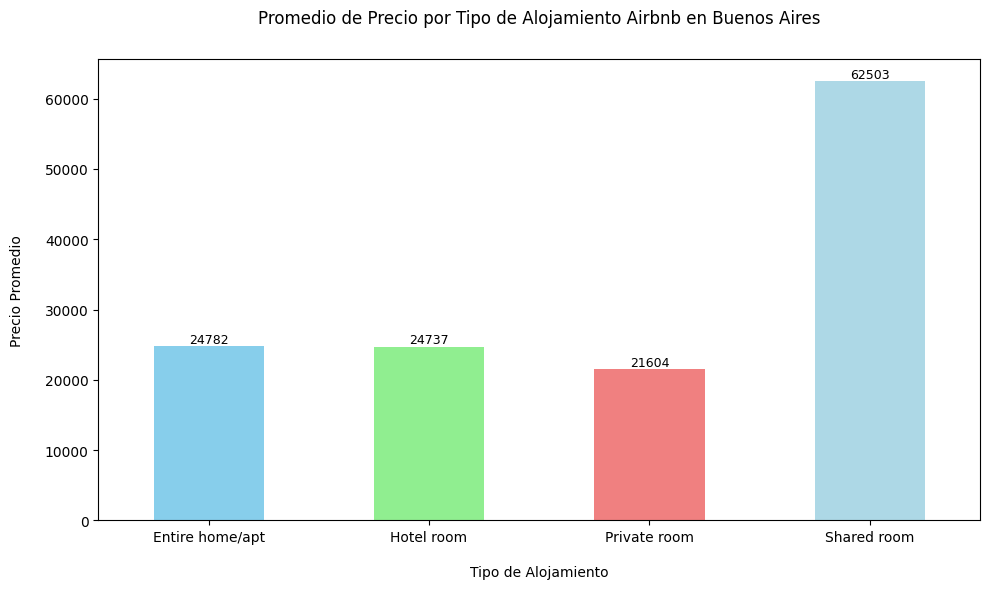

In [ ]:
# Colores personalizados
colores_barras = ['skyblue', 'lightgreen', 'lightcoral', 'lightblue', 'pink']

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
ax = promedio_por_tipo.plot(kind='bar', color=colores_barras)

# Crear un estilo de fondo personalizado
plt.style.use({
    'axes.facecolor': 'whitesmoke',  # Color de fondo del gráfico
    'axes.edgecolor': 'lightgrey',  # Color del borde del gráfico
    'grid.color': 'white',  # Color de las líneas de cuadrícula
    'axes.labelcolor': 'black'  # Color de las etiquetas
    })

# Personalizar el gráfico
plt.title('Promedio de Precio por Tipo de Alojamiento Airbnb en Buenos Aires', y=1.06)
plt.xlabel('Tipo de Alojamiento', labelpad=15)
plt.ylabel('Precio Promedio', labelpad=15)
plt.xticks(rotation=0)  # Rotar etiquetas en el eje X para mayor legibilidad

# Alinear y ajustar los espaciados internos
plt.tight_layout()

# Agregar números en las barras con un mayor espaciado vertical y horizontal
for i, v in enumerate(promedio_por_tipo):
    ax.text(i, v, f'{v:.0f}', ha='center', va='bottom', fontsize=9, color='black', rotation='horizontal')

# Mostrar el gráfico
plt.show()


### ↪ Promedio de ingresos

Calculamos el promedio de ingreso del set de datos (recordar que el df contiene la información de un trimestre: julio-agosto-setiembre 2023).

Se tiene como objetivo calcular el ingreso promedio generado por los alojamientos en el conjunto de datos df_argentina.

In [ ]:
# Calcular el ingreso total
df_argentina['ingreso_total'] = df_argentina['precio'] * df_argentina['minimo_noches']
ingreso_total = df_argentina['ingreso_total'].sum()

# Calcular el número total de alojamientos
total_alojamientos = len(df_argentina)

# Calcular el ingreso promedio
ingreso_promedio = ingreso_total / total_alojamientos

print("Ingreso promedio:", ingreso_promedio)

Ingreso promedio: 188728.3479179445


El resultado muestra que el ingreso promedio por alojamiento en el conjunto de datos de Airbnb para Bs.As. Argentina es de aproximadamente 188,728.35. Este valor representa el promedio de los ingresos generados por cada alojamiento en la ciudad.

### ↪ Cantidad y % de alojamientos realizados por barrio

In [ ]:
# Agrupar el DataFrame por el campo 'barrio' y contar la cantidad de alojamientos en cada barrio.
alojamientos_por_barrio = df_argentina['barrio'].value_counts().reset_index()
alojamientos_por_barrio.columns = ['barrio', 'cantidad_alojamientos']

# Calcular el porcentaje de alojamientos en cada barrio.
total_alojamientos = len(df_argentina)
alojamientos_por_barrio['porcentaje'] = (alojamientos_por_barrio['cantidad_alojamientos'] / total_alojamientos) * 100

# Ordenar el DataFrame por 'cantidad_alojamientos' en orden descendente.
alojamientos_por_barrio = alojamientos_por_barrio.sort_values(by='cantidad_alojamientos', ascending=False)

# Imprimir el resultado.
print(alojamientos_por_barrio)

               barrio  cantidad_alojamientos  porcentaje
0             Palermo                   9832   33.503714
1            Recoleta                   4355   14.840183
2         San Nicolas                   1733    5.905404
3            Belgrano                   1581    5.387446
4              Retiro                   1393    4.746814
5           Monserrat                   1211    4.126627
6             Almagro                   1071    3.649560
7        Villa Crespo                    981    3.342875
8           Balvanera                    969    3.301983
9           San Telmo                    801    2.729503
10         Colegiales                    690    2.351257
11              Nuñez                    643    2.191099
12          Caballito                    584    1.990050
13          Chacarita                    484    1.649288
14       Constitucion                    363    1.236966
15      Villa Urquiza                    358    1.219928
16      Puerto Madero          

El resultado proporciona una visión detallada de la distribución de alojamientos en diferentes barrios de Bs.As. Argentina. Cada fila del DataFrame muestra el nombre del barrio, la cantidad de alojamientos en ese barrio y el porcentaje de alojamientos que representa con respecto al total.

Este análisis es esencial para comprender qué áreas o barrios son más populares o tienen una mayor concentración de alojamientos en Airbnb en la ciudad de Bs. As. en el trimestre. Puede ser útil tanto para viajeros que buscan alojamiento en áreas específicas como para anfitriones que desean comprender la competencia en su área.

Elaboramos un gráfico para visualizar mejor el resultado

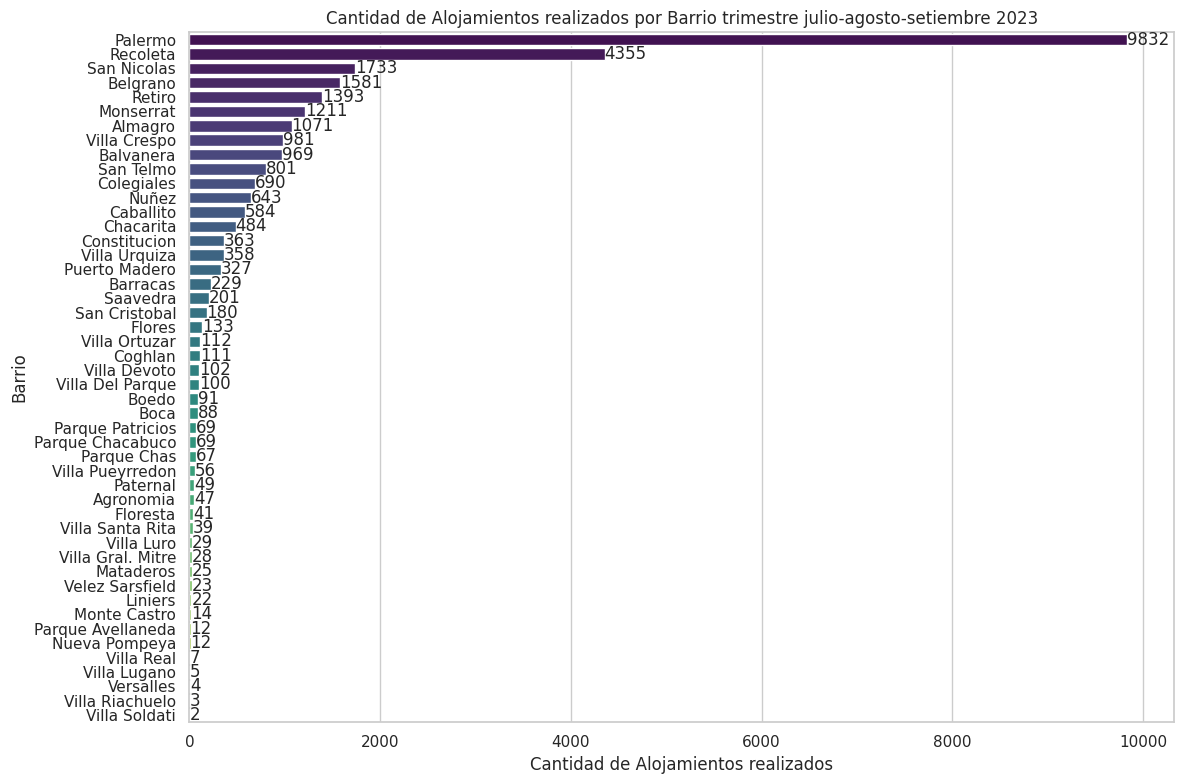

In [ ]:
# Establecer un estilo de gráfico de barras
sns.set(style="whitegrid")

# Crear un gráfico de barras horizontal para una mejor legibilidad
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="cantidad_alojamientos", y="barrio", data=alojamientos_por_barrio, palette="viridis")

# Agregar etiquetas y título
plt.xlabel("Cantidad de Alojamientos realizados")
plt.ylabel("Barrio")
plt.title("Cantidad de Alojamientos realizados por Barrio trimestre julio-agosto-setiembre 2023")

# Mostrar los valores en las barras
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f"{int(width)}", ha="left", va="center")

plt.tight_layout()
plt.show()


### ↪ Cantidad de alojamientos que tuvo cada anfitrion y barrio

In [ ]:
# Agrupar el DataFrame por 'id_anfitrion' y contar la cantidad de alojamientos.
alojamientos_por_anfitrion = df_argentina.groupby(['id_anfitrion', 'nombre_anfitrion'])['id'].count().reset_index()
alojamientos_por_anfitrion.columns = ['id_anfitrion', 'nombre_anfitrion', 'cantidad_alojamientos']

# Encontrar la ubicación de cada anfitrión.
ubicacion_por_anfitrion = df_argentina.groupby(['id_anfitrion', 'nombre_anfitrion'])['barrio'].first().reset_index()

# Combinar los DataFrames en uno solo.
resultado = pd.merge(alojamientos_por_anfitrion, ubicacion_por_anfitrion, on=['id_anfitrion', 'nombre_anfitrion'])

# Crear un widget de DataFrame interactivo
df_widget = widgets.Output()
with df_widget:
    display(resultado)

# Mostrar el widget
df_widget


Output()

Esta información es valiosa para comprender la actividad de los anfitriones y su distribución geográfica. Los usuarios pueden navegar por la tabla para explorar detalles sobre cada anfitrión y sus alojamientos.

Exportemos el resultado a un archivo de excel

In [ ]:
# from google.colab import files

## Nombre del archivo de Excel de salida
# archivo_excel = "resultado_anfitriones.xlsx"

# Exportar los datos a un archivo Excel
# resultado.to_excel(archivo_excel, index=False)

## Descargar el archivo automáticamente
# files.download(archivo_excel)


Apliquemos el filtro por "id_anfitrión" para poder ver la cantidad de alojamientos por anfitrión y barrios

In [ ]:
# Agrupar el DataFrame por 'id_anfitrion' y contar la cantidad de alojamientos.
alojamientos_por_anfitrion = df_argentina.groupby(['id_anfitrion', 'nombre_anfitrion'])['id'].count().reset_index()
alojamientos_por_anfitrion.columns = ['id_anfitrion', 'nombre_anfitrion', 'cantidad_alojamientos']

# Encontrar la ubicación de cada anfitrión.
ubicacion_por_anfitrion = df_argentina.groupby(['id_anfitrion', 'nombre_anfitrion'])['barrio'].first().reset_index()

# Combinar los DataFrames en uno solo.
resultado = pd.merge(alojamientos_por_anfitrion, ubicacion_por_anfitrion, on=['id_anfitrion', 'nombre_anfitrion'])

# Crear un widget de filtro por id_anfitrion
filtro_id_anfitrion = widgets.Dropdown(
    options=['Todos'] + resultado['id_anfitrion'].unique().tolist(),
    value='Todos',
    description='ID del Anfitrión:'
)

# Función para aplicar el filtro
def filtrar_datos(id_anfitrion):
    if id_anfitrion == 'Todos':
        datos_filtrados = resultado
    else:
        datos_filtrados = resultado[resultado['id_anfitrion'] == id_anfitrion]

    with output:
        output.clear_output()
        display(datos_filtrados)

# Aplicar el filtro al interactuar con el widget
output = widgets.Output()
display(filtro_id_anfitrion, output)
filtro_id_anfitrion.observe(lambda change: filtrar_datos(change.new), names='value')


Dropdown(description='ID del Anfitrión:', options=('Todos', 13426, 18378, 20848, 23617, 25625, 28280, 32926, 3…

Output()

### ↪ % de propietarios con un alojamiento

In [ ]:
# Identificar propietarios únicos
prop_unicos = df_argentina[['id_anfitrion', 'nombre_anfitrion']].drop_duplicates()

# Contar la cantidad de propietarios únicos
total_prop_unicos = prop_unicos.shape[0]

# Identificar propietarios únicos con exactamente 1 alojamiento
prop_un_alojamiento = df_argentina.groupby(['id_anfitrion', 'nombre_anfitrion'])['id'].count().reset_index()
prop_un_alojamiento = prop_un_alojamiento[prop_un_alojamiento['id'] == 1]

# Contar la cantidad de propietarios con exactamente 1 alojamiento
total_prop_un_alojamiento = prop_un_alojamiento.shape[0]

# Calcular el porcentaje de propietarios con 1 alojamiento
porc_prop_un_alojamiento = (total_prop_un_alojamiento / total_prop_unicos) * 100

print(f"Porcentaje de propietarios con 1 alojamiento: {porc_prop_un_alojamiento:.2f}%")

Porcentaje de propietarios con 1 alojamiento: 76.77%


El resultado muestra que aproximadamente el 76.77% de los propietarios en el conjunto de datos de Airbnb en Bs.As. en el trimestre tienen exactamente 1 alojamiento listado. Esto significa que la gran mayoría de los propietarios tienen una sola propiedad para alquilar.

Este análisis puede ser útil para comprender la diversidad de propietarios en la plataforma y cuántos de ellos tienen un enfoque en un solo alojamiento.

### ↪ Anfitriones Top

Lista de anfitriones Top basada en el dataframe de Bs.As. trimestre julio-agosto-setiembre 2023

In [ ]:
# Calcular la cantidad de alojamientos por anfitrión y ordenar en orden descendente
anfitriones_top = df_argentina.groupby(['id_anfitrion', 'nombre_anfitrion'])['id'].count().reset_index()
anfitriones_top.columns = ['id_anfitrion', 'nombre_anfitrion', 'cantidad_alojamientos']
anfitriones_top = anfitriones_top.sort_values(by='cantidad_alojamientos', ascending=False)

# Seleccionar los 20 anfitriones principales (ajusta el número según tus necesidades)
top_anfitriones = anfitriones_top.head(20)

# Mostrar la lista de los 20 anfitriones principales
print("Los 20 anfitriones con la mayor cantidad de alojamientos:")
print(top_anfitriones)

Los 20 anfitriones con la mayor cantidad de alojamientos:
       id_anfitrion     nombre_anfitrion  cantidad_alojamientos
297         1021694             Fliphaus                    205
1951       11256892            HomelyJoy                    170
4825       55553719   For Rent Argentina                    163
4608       51699880               Lorena                    147
10526     278440549  Boutique Apartments                    146
777         3469227             Federico                    133
362         1409800              Mariano                    121
7408      132838002                Pablo                    119
9761      234799487             M&M Rent                    118
9177      210147055     Giorgina Y Ángel                    115
12079     441482178             Santiago                    109
11211     334271335              Cecilia                    108
1437        7786587                Maxim                     97
475         1875949                Diego      

### ↪ Qué nos pueden decir las reseñas?

Analicemos un poco el tema de las reseñas

In [ ]:
# visualicemos nuevamente el df_argentina para chequear su estado
df_argentina.head()

,id,nombre,id_anfitrion,nombre_anfitrion,barrio,latitude,longitude,tipo_habitacion,precio,minimo_noches,numero_reseñas,calculated_host_listings_count,disponibilidad,ingreso_total
0,11508,Condo in Buenos Aires · ★4.81 · 1 bedroom · 1 ...,42762,Candela,Palermo,-34.581840,-58.424150,Entire home/apt,23753,3,36,1,240,71259
1,14222,Rental unit in Palermo/Buenos Aires · ★4.79 · ...,87710233,María,Palermo,-34.586170,-58.410360,Entire home/apt,11928,7,110,7,162,83496
2,15074,Rental unit in Buenos Aires · 1 bedroom · 1 be...,59338,Monica,Nuñez,-34.538920,-58.465990,Private room,10501,29,0,1,0,304529
3,16695,Loft in Buenos Aires · ★4.28 · 1 bedroom · 1 b...,64880,Elbio Mariano,Monserrat,-34.614390,-58.376110,Entire home/apt,17501,2,46,9,234,35002
4,20062,Rental unit in Buenos Aires · ★4.93 · 2 bedroo...,75891,Sergio Damian,Palermo,-34.581848,-58.441605,Entire home/apt,35654,2,290,4,117,71308


Calcular la mediana y el promedio de reseñas:

In [ ]:
# Calcular la mediana y el promedio de reseñas
mediana_resenas = df_argentina['numero_reseñas'].median()
promedio_resenas = df_argentina['numero_reseñas'].mean()

print(f"Mediana de reseñas: {mediana_resenas}")
print(f"Promedio de reseñas: {promedio_resenas}")

Mediana de reseñas: 8.0
Promedio de reseñas: 22.120425270905745


En base a los resutlados podemos sacar algunas observaciones:

- La mediana es significativamente más baja que el promedio, lo que sugiere que hay algunos alojamientos con un gran número de reseñas que están inflando el promedio.

- El promedio más alto indica que algunos alojamientos han recibido un gran número de reseñas, posiblemente debido a su popularidad o tiempo en la plataforma. Al mismo tiempo, la mediana más baja indica que la mayoría de los alojamientos tienen un número relativamente bajo de reseñas.

- Los alojamientos extremadamente populares con un gran número de reseñas pueden estar sesgando el promedio hacia arriba. Esto significa que unos pocos alojamientos con muchas reseñas pueden estar teniendo un impacto significativo en el promedio.

- La diferencia entre la mediana y el promedio sugiere que hay una variación significativa en la calidad y popularidad de los alojamientos en el conjunto de datos. Algunos alojamientos son muy populares y tienen muchas reseñas, mientras que otros tienen menos reseñas.

Explorar la distribución de reseñas  utilizando un gráfico para visualizar cómo se distribuyen las reseñas en el conjunto de datos y determinar si hay una concentración en un rango particular de valores.

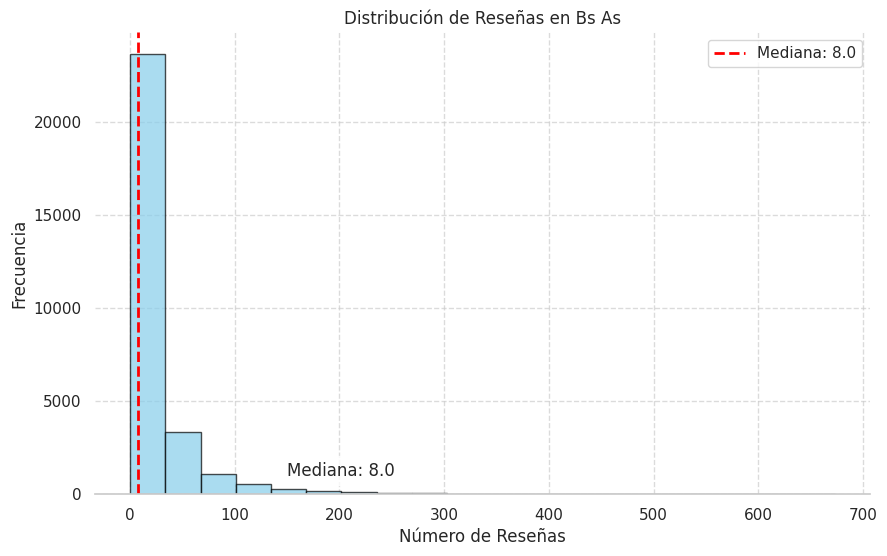

In [ ]:
# Establecer el estilo de la gráfica con Seaborn
sns.set_style("whitegrid")

# Crear un histograma
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
plt.hist(df_argentina['numero_reseñas'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Número de Reseñas')
plt.ylabel('Frecuencia')
plt.title('Distribución de Reseñas en Bs As')

# Agregar una línea vertical para la mediana
median = df_argentina['numero_reseñas'].median()
plt.axvline(median, color='red', linestyle='dashed', linewidth=2, label=f'Mediana: {median}')

# Agregar una leyenda
plt.legend()

# Mostrar un cuadro con estadísticas
plt.text(150, 1000, f'Mediana: {median}', bbox=dict(facecolor='white', alpha=0.8))

# Personalizar el diseño
plt.grid(True, linestyle='--', alpha=0.7)
sns.despine(left=True)  # Quitar los bordes izquierdos para una apariencia más limpia

# Mostrar el histograma
plt.show()

Estudiemos un poco las correlaciones

In [ ]:
# Calcula la matriz de correlación de Pearson (variables numéricas)
correlac_matrix = df_argentina.corr()

# Filtra las correlaciones de 'numero_reseñas' con otras variables
correlac_resenas = correlac_matrix['numero_reseñas']

# Imprime las correlaciones
print("Correlaciones con 'numero_reseñas':")
print(correlac_resenas)

Correlaciones con 'numero_reseñas':
id                               -0.394748
id_anfitrion                     -0.170712
latitude                          0.008256
longitude                         0.079128
precio                           -0.010035
minimo_noches                    -0.050885
numero_reseñas                    1.000000
calculated_host_listings_count   -0.030160
disponibilidad                   -0.011842
ingreso_total                    -0.007073
Name: numero_reseñas, dtype: float64


<ipython-input-39-cebdc3f24c25>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



EL resultado deja evidencia de que no hay correlaciones fuertes entre la variable "numero_reseñas" y el resto.
Por ejemplo una correlación de -0.010 está muy cerca de cero, lo que sugiere que el precio y el número de reseñas no tienen una relación lineal significativa. Esto significa que, en general, el precio de un alojamiento no parece estar fuertemente relacionado con la cantidad de reseñas que recibe. En otras palabras, un precio más alto o más bajo no parece influir significativamente en la cantidad de reseñas que los alojamientos reciben.

Alojamientos con pocas o ninguna reseña:

In [ ]:
# Filtrar alojamientos con menos de 5 reseñas ordenados de mayor a menor
aloj_pocas_resenas = df_argentina[df_argentina['numero_reseñas'] < 5].sort_values(by='numero_reseñas', ascending=False)

# Imprimir los primeros 10 alojamientos con pocas reseñas
print(aloj_pocas_resenas.head(10))

                       id                                             nombre  \
16602  745602559089214891  Loft in Monserrat · ★4.25 · 1 bedroom · 1 bed ...   
19441  813211839709345698  Bed and breakfast in DFA · ★5.0 · 1 bedroom · ...   
27119  953438767290081560  Rental unit in Buenos Aires · ★4.75 · 1 bedroo...   
19151  807406599365351155  Bed and breakfast in Buenos Aires · ★4.0 · 1 b...   
27103  953058449247628676  Rental unit in Buenos Aires · ★5.0 · 1 bedroom...   
27100  953032952294071211  Rental unit in Buenos Aires · ★5.0 · 2 bedroom...   
19190  807922534015383408  Home in Buenos Aires · ★5.0 · 1 bedroom · 1 be...   
5641             30349218  Rental unit in Buenos Aires  · ★5.0 · 1 bedroo...   
5628             30289156  Rental unit in Buenos Aires · ★3.75 · 1 bedroo...   
19229  808551263428630264  Rental unit in Buenos Aires · ★4.25 · 2 bedroo...   

       id_anfitrion      nombre_anfitrion         barrio   latitude  \
16602     474738187               Nicolas      M

Alojamientos populares:

In [ ]:
# Filtrar alojamientos con más de 100 reseñas (ajusta el valor según tu criterio), orden descendente
aloj_populares = df_argentina[df_argentina['numero_reseñas'] > 100].sort_values(by='numero_reseñas', ascending=False)

# Mostrar los primeros 10 alojamientos populares en una tabla
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_colwidth', None)  # Mostrar todo el contenido de las celdas

print("Primeros 10 alojamientos populares (ordenados por número de reseñas en orden descendente):")
display(aloj_populares.head(10))


Primeros 10 alojamientos populares (ordenados por número de reseñas en orden descendente):


,id,nombre,id_anfitrion,nombre_anfitrion,barrio,latitude,longitude,tipo_habitacion,precio,minimo_noches,numero_reseñas,calculated_host_listings_count,disponibilidad,ingreso_total
820,2018802,Condo in Buenos Aires · ★4.82 · 1 bedroom · 3 beds · 0 shared baths,10283011,Maria Lucrecia,Monserrat,-34.612950,-58.371910,Private room,4900,1,673,1,240,4900
215,370013,Serviced apartment in Buenos Aires · ★4.57 · 1 bedroom · 2 beds · 1 bath,1985312,Natalí,San Nicolas,-34.604750,-58.375740,Entire home/apt,12251,7,533,2,364,85757
498,982269,Rental unit in Buenos Aires · ★4.87 · 1 bedroom · 1 bed · 1 bath,370901,Rocio & Nicolas,Palermo,-34.581960,-58.406860,Entire home/apt,16252,1,485,3,251,16252
237,413662,Condo in Buenos Aires · ★4.47 · 1 bedroom · 1 bed · 1 bath,1985312,Natalí,Monserrat,-34.611230,-58.383730,Entire home/apt,8401,7,463,2,340,58807
106,154548,Loft in Buenos Aires · ★4.93 · Studio · 1 bed · 1 bath,576398,Florencia,Recoleta,-34.595750,-58.406860,Entire home/apt,11250,2,441,2,172,22500
3138,17806895,Serviced apartment in Capital federal · ★4.79 · Studio · 1 bed · 1 bath,104897600,Top Rentals,Retiro,-34.597450,-58.378470,Entire home/apt,15975,1,424,27,359,15975
1024,2961506,Rental unit in Buenos Aires · ★4.97 · Studio · 1 bed · 1 bath,15111765,Ezequiel Martin,Palermo,-34.568710,-58.436440,Entire home/apt,13802,2,409,4,343,27604
3814,22002003,Loft in Buenos Aires · ★4.88 · Studio · 2 beds · 1 bath,50778624,Marisol,Palermo,-34.583321,-58.426567,Entire home/apt,17501,1,406,1,232,17501
2662,14980239,Loft in Micro Centro · ★4.73 · 1 bedroom · 1 bed · 1 private bath,94391544,Leila,San Nicolas,-34.600100,-58.376900,Private room,6710,30,405,5,44,201300
3811,21993142,Rental unit in San Nicolas · ★4.58 · 1 bedroom · 1 bed · 1 bath,94391544,Leila,San Nicolas,-34.599430,-58.377880,Entire home/apt,5964,14,392,5,28,83496


Comparaciones por tipo de alojamiento o ubicación:

In [ ]:
# Comparar el número de reseñas entre diferentes tipos de alojamiento
resenas_por_tipo_ordenado = df_argentina.groupby('tipo_habitacion')['numero_reseñas'].mean().sort_values(ascending=False)

print("Número medio de reseñas por tipo de habitación (ordenado en orden descendente):")
print(resenas_por_tipo_ordenado)

Número medio de reseñas por tipo de habitación (ordenado en orden descendente):
tipo_habitacion
Entire home/apt    22.915366
Private room       15.578558
Hotel room         14.595960
Shared room         5.772093
Name: numero_reseñas, dtype: float64


Dado los resutlados el tipo de habitación con mayor número de reseñas es el tipo de habitación "Entire home/apt", con un promedio de aproximadamente 22.92 reseñas. Esto sugiere que, en promedio, alojamientos de este tipo reciben más reseñas que los demás.
Comprender cómo los diferentes tipos de habitación impactan en la cantidad de reseñas que reciben. Por ejemplo, es común que los alojamientos completos o "Entire home/apt" reciban más reseñas que las habitaciones compartidas o "Shared room". Esto puede deberse a las experiencias que los huéspedes tienen en diferentes tipos de alojamientos.

In [ ]:
# Comparar el número de reseñas entre diferentes ubicaciones
resenas_por_ubicacion = df_argentina.groupby('barrio')['numero_reseñas'].mean().sort_values(ascending=False)

print(resenas_por_ubicacion)

barrio
San Nicolas          28.984420
Palermo              27.437856
San Telmo            25.347066
Retiro               24.875090
Puerto Madero        24.782875
Recoleta             23.646843
Constitucion         22.421488
Monserrat            21.494633
Villa Crespo         19.555556
Barracas             16.729258
Nuñez                15.841369
Balvanera            15.779154
Boca                 14.886364
Chacarita            14.667355
Colegiales           14.482609
Boedo                14.274725
Almagro              13.948646
Saavedra             13.597015
Belgrano             13.478811
Villa Luro           11.034483
Villa Santa Rita     11.025641
Parque Chacabuco     10.739130
Villa Urquiza        10.731844
Coghlan              10.711712
Villa Pueyrredon     10.410714
Caballito            10.402397
Flores                9.684211
Floresta              9.609756
Villa Ortuzar         9.455357
Parque Patricios      9.260870
Parque Chas           9.149254
Villa Gral. Mitre     9.107143
A

Algunas observaciones basadas en el resultado:

Los barrios "San Nicolas", "Palermo" y "San Telmo" tienen los números medios más altos de reseñas, con valores de aproximadamente 28.98, 27.44 y 25.35, respectivamente. Esto sugiere que los alojamientos en estos barrios tienden a recibir más reseñas en promedio.

Hay una amplia variabilidad en el número medio de reseñas entre los diferentes barrios. Mientras que algunos barrios como "San Nicolas" y "Palermo" tienen números medios significativamente altos, otros como "Villa Real", "Villa Riachuelo" y "Villa Soldati" tienen números medios de reseñas muy bajos o incluso cero.

Esta información puede ser útil para comprender la popularidad relativa de los barrios en términos de alojamientos con reseñas. Los barrios más populares pueden ser atractivos para los turistas y viajeros, lo que podría explicar el mayor número de reseñas.

Es importante tener en cuenta que la cantidad de reseñas puede depender de varios factores, como la ubicación, la oferta de alojamientos, la afluencia de turistas y más. Los resultados proporcionan una visión general de la actividad de reseñas por barrio en el conjunto de datos, pero se deben considerar otros factores para obtener una comprensión completa.




Recordar:
La interpretación de los resultados debe realizarse en función del contexto de los datos y los objetivos de análisis específicos.
Tener en cuenta que estos resultados reflejan una relación observada en los datos y no implican necesariamente causalidad.

Anfitriones destacados:

In [ ]:
# Agrupar el DataFrame por el nombre del anfitrión y calcular la cantidad de alojamientos y el número total de reseñas para cada anfitrión.
anfitriones_destacados = df_argentina.groupby('nombre_anfitrion').agg({'id': 'count', 'numero_reseñas': 'sum'}).reset_index()

# Renombrar las columnas para mayor claridad.
anfitriones_destacados.columns = ['nombre_anfitrion', 'cantidad_alojamientos', 'cantidad_reseñas']

# Ordenar los anfitriones destacados por el número de alojamientos en orden descendente.
anfitriones_destacados = anfitriones_destacados.sort_values(by='cantidad_alojamientos', ascending=False)

# Mostrar los 10 anfitriones destacados (puedes ajustar el número según tus necesidades).
print(anfitriones_destacados.head(10))

     nombre_anfitrion  cantidad_alojamientos  cantidad_reseñas
2807            Pablo                    420              7914
1072         Federico                    409              7294
827             Diego                    350              8290
2126            Maria                    322              7432
581           Cecilia                    292              3560
3170         Santiago                    262              3704
1669             Juan                    262              4559
2257          Mariano                    252              5967
1931            Lucas                    224              5225
2335           Martin                    217              6391


### ↪ Mapa interactivo Buenos Aires | Airbnb

Mapa interactivo de Buenos Aires con todos los marcadores de los alojamientos realizados.

Utilizaremos la librería folium para crear el mapa interactivo.
Los alojamientos están agrupados en clústeres para facilitar la visualización de múltiples puntos en el mapa. Los usuarios pueden hacer clic en los marcadores para ver más detalles sobre cada alojamiento. Este tipo de visualización es útil para identificar la distribución geográfica de los alojamientos en la ciudad y puede contener información valiosa para los usuarios que buscan alojamiento en Buenos Aires.

In [ ]:
#!pip3 install folium==0.5.0
import folium

print('Folium instalado e importado!')

Folium instalado e importado!


In [ ]:
from folium import plugins

# variables para latitud y longitud de la ciudad de Buenos Aires (Argentina)
latitud_bsas = -34.61315
longitud_bsas = -58.37723

# crear mapa
mapa_bsas = folium.Map(location = [latitud_bsas, longitud_bsas], zoom_start = 12)

# crear una instancia de un objeto de grupo de marcas para los alojamientos en el df
alojamientos = plugins.MarkerCluster().add_to(mapa_bsas)

# recorrer el marco de datos y agreguar cada punto de datos al grupo de marcas
for lat, lng, label, in zip(df_argentina.latitude, df_argentina.longitude, df_argentina.nombre):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(alojamientos)

# visualizar el mapa
mapa_bsas

Output hidden; open in https://colab.research.google.com to view.

### 🔊 Algunas conclusiones...

🔹 `Destinos`:

Buenos Aires ofrece una variedad de barrios únicos para explorar. Los datos revelan cuáles fueron los destinos más buscados durante este período:

- San Nicolás: este barrio céntrico con casi 29 reseñas de media, fue uno de los destinos favoritos de los viajeros.
- Palermo: Con una media de 27.44 reseñas, atrae a aquellos que buscan experiencias de moda y estilo de vida.
- San Telmo: Con una media de 25.35 reseñas, te sumerge en la historia y la cultura de la ciudad.

🔹 `Variedad de Alojamiento:`

Los viajeros tuvieron una amplia gama de opciones de alojamiento en Buenos Aires. Los datos revelan cuáles fueron los tipos de alojamiento más populares:

- Alojamiento completo (Entire home/apt): Con una media de 22.92 reseñas, esta opción ofrece privacidad y comodidad.
- Habitación privada (Private room): Con una media de 15.58 reseñas, estas habitaciones ofrecen una experiencia más íntima.
- Habitación de hotel (Hotel room): Con 14.59 reseñas de media, los hoteles ofrecen comodidades adicionales y servicio.


🔹 `Anfitriones Destacados:`

Encontramos a algunos anfitriones excepcionales que se destacaron por su hospitalidad y cantidad de alojamientos:

- Anfitrión Destacado 1: **Pablo** - Con 420 alojamientos y 7914 reseñas.
- Anfitrión Destacado 2: **Federico** - Con 409 alojamientos y 7294 reseñas.
- Anfitrión Destacado 3: **Diego** - Con 350 alojamientos y 8290 reseñas.

### ↪ Visualización final

In [ ]:
# Descargamos el df_argentina para utilizarlo en Power BI, para nuestro Dashboard

from google.colab import files

# Nombre del archivo de Excel de salida
datosBsAs = "datosBsAs.xlsx"

# Exportar los datos a un archivo Excel
df_argentina.to_excel(datosBsAs, index=False)

# Descargar el archivo automáticamente
files.download(datosBsAs)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Visualización en proceso...